In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

2024-12-06 21:39:24.064157: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733500464.113052    7220 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733500464.128520    7220 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-06 21:39:24.246436: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
# Check if GPUs are available
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"GPUs are available: {[gpu.name for gpu in gpus]}")
else:
    print("No GPUs are available.")

Num GPUs Available:  1
GPUs are available: ['/physical_device:GPU:0']


In [3]:
img_array = cv2.imread("Image_Dataset/train/0/0.jpg")

In [4]:
img_array.shape # rgb

(48, 48, 3)

- when you load an image in OpenCV using cv2.imread(), the color channels are stored in BGR order, not RGB.

In [5]:
print(img_array)

[[[ 72  72  72]
  [ 78  78  78]
  [ 81  81  81]
  ...
  [ 52  52  52]
  [ 43  43  43]
  [ 40  40  40]]

 [[ 65  65  65]
  [ 62  62  62]
  [ 59  59  59]
  ...
  [ 55  55  55]
  [ 52  52  52]
  [ 45  45  45]]

 [[ 47  47  47]
  [ 42  42  42]
  [ 60  60  60]
  ...
  [ 47  47  47]
  [ 54  54  54]
  [ 49  49  49]]

 ...

 [[ 91  91  91]
  [ 65  65  65]
  [ 46  46  46]
  ...
  [ 74  74  74]
  [ 54  54  54]
  [ 43  43  43]]

 [[ 76  76  76]
  [ 80  80  80]
  [ 76  76  76]
  ...
  [108 108 108]
  [ 69  69  69]
  [ 46  46  46]]

 [[ 77  77  77]
  [ 74  74  74]
  [ 81  81  81]
  ...
  [105 105 105]
  [108 108 108]
  [ 82  82  82]]]


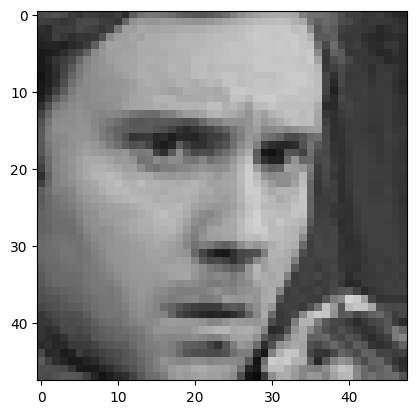

In [6]:
plt.imshow(img_array) # brg

In [7]:
data_directory = "Image_Dataset/train/" # Training Dataset

In [8]:
classes = ['0','1','2','3','4','5','6'] # list of classes [exact names of folders inside train folder]

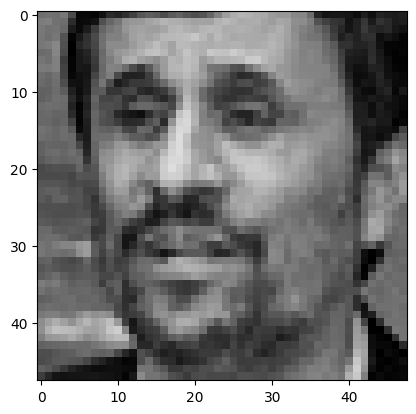

In [9]:
for category in classes: 
    '''The classes variable is expected to be a 
list or iterable containing category names (['0', '1', '2','3','4','5','6']). 
This loop iterates over each class in the dataset.'''
    
    path = os.path.join(data_directory, category) 
    '''Combines the base directory (data_directory) 
    with the current category name (category) to create a full path to that category's folder.'''
    
    for img in os.listdir(path): 
        '''Lists all image files in the path directory (the category folder).
    This loop will iterate over the filenames of images in the category folder.'''
         
        img_array = cv2.imread(os.path.join(path,img)) 
        '''Reads the image using cv2.imread() at the path
        formed by joining path and img. The result is stored in img_array, 
        which will be a NumPy array representing the image.'''

        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)) 
        '''cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB) converts the image
        from BGR (OpenCV default) to RGB (common for displaying images in libraries like Matplotlib).
        plt.imshow() is used to display the image using Matplotlib.'''

        plt.show() 
        '''This command displays the image using Matplotlib’s default viewer.
                      The image will appear in a pop-up window.'''
        
        break 
        '''The first break is inside the image loop. It breaks out of the 
                 inner loop after displaying justone image from the path directory.
                 
                 The second break is inside the category loop. It breaks out of the outer 
                 loop after processing just one image from the first category, meaning only one image
                 from the first category will be displayed.
'''
    break

In [10]:
# img_size = 224
# new_array = cv2.resize(img_array,(img_size, img_size))
# plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB)) 
# plt.show()

In [11]:
img_array.shape 

(48, 48, 3)

- `48 (Height)`: The number of pixels along the vertical axis (image height).
- `48 (Width)`: The number of pixels along the horizontal axis (image width).
- `3 (Channels)`: The number of color channels. In the case of color images:
    - 3 channels represent the `Red, Green, and Blue` channels in the RGB color space.

## Read all images and convert them to an array

In [12]:
# Create an empty list for storing the training data
training_data = []
valid_extensions = ('.jpg', '.jpeg', '.png')
img_size = 244

# Function to create the training data (loading images and labels)
def creating_training_data():
    for category in classes:
        path = os.path.join(data_directory, category)
        class_num = classes.index(category)  # 0,1,2,3,4,5,6

        for img in os.listdir(path):
            if img.startswith('.ipynb'):  # Skip hidden files
                continue
            if not img.endswith(valid_extensions):  # Check for valid extensions
                continue
            try:
                img_array = cv2.imread(os.path.join(path, img))
                if img_array is None:
                    continue
                    
                # Append image array and class number to training_data
                new_array = cv2.resize(img_array, (img_size,img_size))
                training_data.append([new_array, class_num])

            except Exception as e:
                print(f"Error processing image {img}: {e}")








In [13]:
# Run the function to create the training data
creating_training_data()

In [14]:
print(len(training_data))

28821


In [15]:
# Shuffle the training_data to randomize the order of images and labels
import random

random.shuffle(training_data)

In [16]:
# # Convert the training data to a NumPy array
# X = np.array([item[0] for item in training_data])  # Images
# y = np.array([item[1] for item in training_data])  # Labels

# import dask.array as da

# # Assume features are 2D arrays where each row corresponds to a sample
# X = da.from_array([item[0] for item in training_data], chunks=(1000, num_features))  # Choose chunk size as per available memory
# y = da.from_array([item[0] for item in training_data], chunks=(1000, num_features)) 

import numpy as np

# Create memory-mapped files

X = np.memmap('X_data.dat', dtype=np.float32, mode='w+', shape=(28821, 244, 244, 3))
y = np.memmap('y_data.dat', dtype=np.int32, mode='w+', shape=(28821,))

# Populate memory-mapped arrays
for i, (features, label) in enumerate(training_data):
    X[i] = features
    y[i] = label






In [17]:
X.shape

(28821, 244, 244, 3)

In [18]:
y.shape

(28821,)

## Normalization

In [19]:
# # Normalize the images to [0, 1]

# batch_size = 1000
# num_samples = X.shape[0]

# for start in range(0, num_samples, batch_size):
#     end = min(start + batch_size, num_samples)
#     X[start:end] = X[start:end] / 255.0  # Normalize batch-by-batch


# # Check the normalization
# print(f"Min pixel value: {X.min()}, Max pixel value: {X.max()}")  # Should be [0, 1]


In [20]:
y.shape

(28821,)

In [21]:
y[0] # We shuffle labels randomly so output can come random 0 - 6

np.int32(5)

### Spliting the train and test dataset

In [22]:
# from sklearn.model_selection import train_test_split

# # Split the data into training and validation sets
# X_train_indices, X_test_indices, y_train_indices, y_test_indices = train_test_split(
#     np.arange(X.shape[0]), y[:], test_size=0.2, random_state=42
# )

# # Use indices to create train and test views
# X_train = X[X_train_indices]
# X_test = X[X_test_indices]
# y_train = y[y_train_indices]
# y_test = y[y_test_indices]

# # Check shapes
# print(f"X_train shape: {X_train.shape}")
# print(f"X_test shape: {X_test.shape}")
# print(f"y_train shape: {y_train.shape}")
# print(f"y_test shape: {y_test.shape}")


In [23]:
from sklearn.model_selection import train_test_split
import numpy as np

# Split the data into training and validation indices
X_train_indices, X_test_indices, y_train_indices, y_test_indices = train_test_split(
    np.arange(X.shape[0]), y[:], test_size=0.2, random_state=42
)

# Memory-efficient generator for loading batches
def data_generator(memmap_data, memmap_labels, indices, batch_size):
    num_samples = len(indices)
    while True:  # Infinite loop for generators (use with fit)
        for start in range(0, num_samples, batch_size):
            end = min(start + batch_size, num_samples)
            batch_indices = indices[start:end]
            X_batch = memmap_data[batch_indices] / 255.0  # Normalize on the fly
            y_batch = memmap_labels[batch_indices]
            yield X_batch, y_batch

# Define batch size
batch_size = 32

# Create training and testing generators
train_generator = data_generator(X, y, X_train_indices, batch_size)
test_generator = data_generator(X, y, X_test_indices, batch_size)

# Example: Get one batch to verify
X_train_batch, y_train_batch = next(train_generator)
print(f"Train batch shape: {X_train_batch.shape}, Labels shape: {y_train_batch.shape}")

# Check the shapes of the dataset
print(f"Number of training batches: {len(X_train_indices) // batch_size}")
print(f"Number of testing batches: {len(X_test_indices) // batch_size}")


Train batch shape: (32, 244, 244, 3), Labels shape: (32,)
Number of training batches: 720
Number of testing batches: 180


## Deep Learning Model for training - Transfer Learning

In [1]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers

2024-12-06 21:08:09.093026: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733498589.157742    4710 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733498589.176306    4710 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-06 21:08:09.326372: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [69]:
# Load the pre-trained MobileNetV2 model without the top classification layers


model = tf.keras.applications.MobileNetV2()


/tmp/ipykernel_10205/3189301739.py:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model = tf.keras.applications.MobileNetV2( include_top = False ,input_shape = (48, 48, 3))


In [70]:
model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 48, 48, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 24, 24,    │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 24, 24,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 24, 24,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 24, 24,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 24, 24,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 24, 24,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 24, 24,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 24, 24,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 24, 24,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 24, 24,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 24, 24,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 25, 25,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 12, 12,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 12, 12,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 12, 12,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 12, 12,    │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)

## Transfer Learning - Tunning, weight will start from the last check point

In [50]:
# Extract the input tensor from the pre-trained model
base_input = model.input

In [51]:
# Extract the output tensor just before the final classification layers
base_output = model.layers[-2].output  # This is the output tensor of the last layer before the top layer

In [52]:
base_output

<KerasTensor shape=(None, 2, 2, 1280), dtype=float32, sparse=False, name=keras_tensor_152>

In [53]:
final_output = layers.Dense(128)(base_output) #adding new layer after the output of global pooling layer
final_output = layers.Activation('relu')(final_output) # Activation Function
final_output = layers.Dense(64)(final_output) # Dense Layer 
final_output = layers.Activation('relu')(final_output) # Activation Function
final_output = layers.Dense(7,activation = 'softmax')(final_output) # my classes are 7 that's why last output neuron/dense are 7

In [54]:
final_output # final output

<KerasTensor shape=(None, 2, 2, 7), dtype=float32, sparse=False, name=keras_tensor_158>

In [55]:
# Define the new model with the original input and the modified output

new_model = keras.Model(inputs = base_input, outputs = final_output)

In [56]:
new_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 48, 48, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 24, 24,    │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 24, 24,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 24, 24,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 24, 24,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 24, 24,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 24, 24,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 24, 24,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 24, 24,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 24, 24,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 24, 24,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 24, 24,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 25, 25,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 12, 12,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 12, 12,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 12, 12,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 12, 12,    │      2,304 │ block_1_depthwis

 Total params: 2,430,663 (9.27 MB)

 Trainable params: 2,396,551 (9.14 MB)

 Non-trainable params: 34,112 (133.25 KB)

## Compiling the model

In [61]:
new_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [62]:
new_model.fit(X_train, y_train, epochs = 25, validation_data=(X_test, y_test))

2024-12-06 20:47:47.134364: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 637452288 exceeds 10% of free system memory.


Epoch 1/25


ValueError: Argument `output` must have rank (ndim) `target.ndim - 1`. Received: target.shape=(None,), output.shape=(None, 2, 2, 7)